In [48]:
#imports
import pandas as pd
import numpy as np
from datetime import datetime
import env
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [49]:
#dataframe after combining tables from curriculum log
df = wrangle.prepare_log()

In [50]:
#peek head
df.head()

,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [51]:
#peek info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 to 2021-04-21
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         847330 non-null  object        
 1   endpoint     847329 non-null  object        
 2   user_id      847330 non-null  int64         
 3   ip           847330 non-null  object        
 4   cohort_name  847330 non-null  object        
 5   start_date   847330 non-null  datetime64[ns]
 6   end_date     847330 non-null  datetime64[ns]
 7   program_id   847330 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 58.2+ MB


In [52]:
#what are the cohorts
df.cohort_name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Everglades',
       'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Easley', 'Marco', 'Neptune', 'Florence', 'Oberon'], dtype=object)

In [53]:
#unique id's
df.program_id.unique()

array([1, 2, 4, 3])

In [54]:
#data scicnce
df[df.program_id == 3].cohort_name.unique()


array(['Bayes', 'Curie', 'Darden', 'Easley', 'Florence'], dtype=object)

In [55]:
#make data science data base
ds = df[(df.program_id == 3) & (df.cohort_name != "Staff") & (df.endpoint != "/")]

In [56]:
ds.head()

,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2019-08-20,09:40:28,3-sql/1-mysql-overview,470,97.105.19.58,Bayes,2019-08-19,2020-01-30,3
2019-08-20,09:40:30,2-storytelling/bad-charts,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,3
2019-08-20,09:40:30,2-storytelling/misleading1_baseball.jpg,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,3
2019-08-20,09:40:30,2-storytelling/misleading1_fox.jpg,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,3
2019-08-20,09:40:30,2-storytelling/misleading3_deaths.jpg,467,97.105.19.58,Bayes,2019-08-19,2020-01-30,3


In [57]:
ds.shape

(95054, 8)

In [58]:
#web dev
df[df.program_id != 3].cohort_name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Deimos', 'Europa',
       'Fortuna', 'Apex', 'Ganymede', 'Everglades', 'Hyperion', 'Bash',
       'Jupiter', 'Kalypso', 'Luna', 'Marco', 'Neptune', 'Oberon'],
      dtype=object)

In [59]:
#web dev data base
web = df[(df.program_id != 3) & (df.cohort_name != "Staff") & (df.endpoint != "/")]

In [60]:
web.head()

,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,09:56:41,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [61]:
web.shape

(628731, 8)

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [62]:
#data science
ds.endpoint.value_counts()

search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
                                            ... 
python/custom-sorting-functions                1
imports                                        1
java-i/console-io                              1
appendix/univariate_regression_in_excel        1
6-regression/8-Project                         1
Name: endpoint, Length: 681, dtype: int64

    for data science, classification/overwiew has most traffic

In [63]:
#web dev
web.endpoint.value_counts()

toc                                  16669
javascript-i                         16376
search/search_index.json             13982
html-css                             11827
java-iii                             11769
                                     ...  
10.10_Exercises                          1
11-nlp/topic-modeling                    1
6-regression/3.1-acquire-and-prep        1
6-regression/3.3-explore                 1
students                                 1
Name: endpoint, Length: 1288, dtype: int64

    for web dev, javascript - i has most traffic

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [64]:
#for data science
ds.head(1)

,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2019-08-20,09:40:28,3-sql/1-mysql-overview,470,97.105.19.58,Bayes,2019-08-19,2020-01-30,3


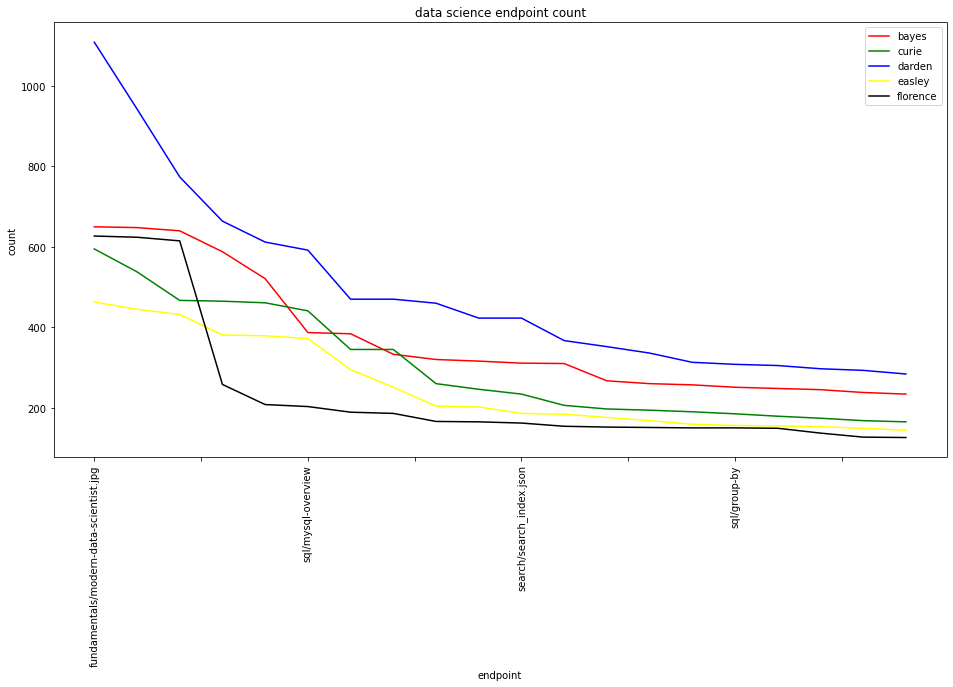

In [65]:
#plot all data sceince cohort's endpoint value count
plt.figure(figsize = (16,8))
ds[ds.cohort_name == "Bayes"].endpoint.value_counts().head(20).plot(label = "bayes",color = "red")
ds[ds.cohort_name == "Curie"].endpoint.value_counts().head(20).plot(label = "curie",color = "green")
ds[ds.cohort_name == "Darden"].endpoint.value_counts().head(20).plot(label = "darden", color = "blue")
ds[ds.cohort_name == "Easley"].endpoint.value_counts().head(20).plot(label = "easley", color = "yellow")
ds[ds.cohort_name == "Florence"].endpoint.value_counts().head(20).plot(label = "florence", color = "black")
plt.xticks(rotation = 90)
plt.xlabel("endpoint")
plt.ylabel("count")
plt.title("data science endpoint count")
plt.legend()
plt.show()  

    it appears darden data science cohort pings higher in each lesson

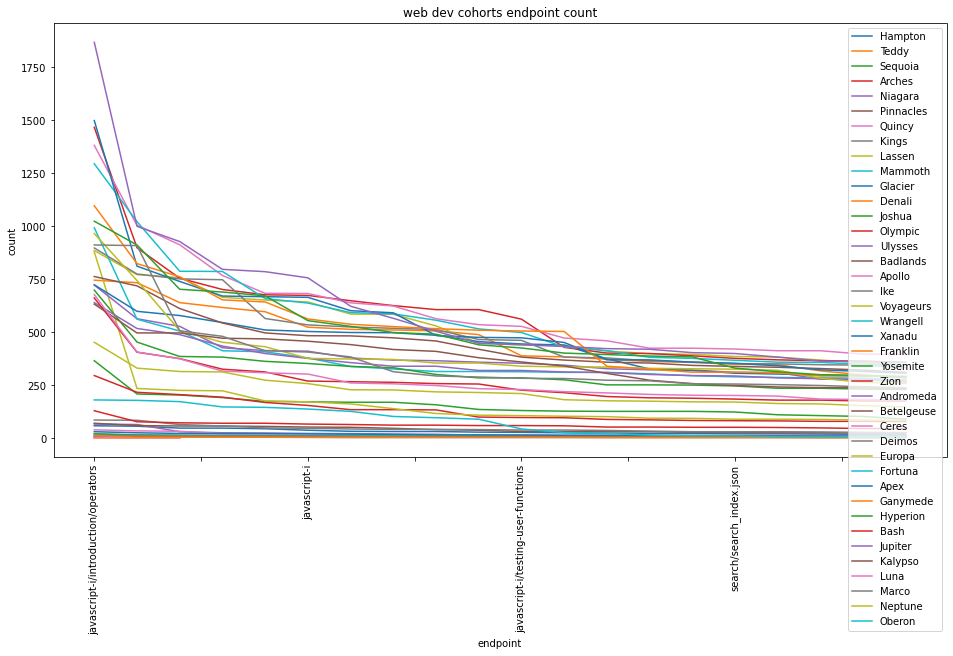

In [66]:
# plot all web dev cohort's endpoint value count
plt.figure(figsize = (16,8))
for cohort in web.cohort_name.unique():
   
    web[web.cohort_name == cohort].endpoint.value_counts().head(20).plot(label = cohort)
    plt.xticks(rotation = 90)
    plt.xlabel("endpoint")
    plt.ylabel("count")
    plt.title("web dev cohorts endpoint count")
    plt.legend()


In [67]:
#need more explore

In [68]:
active = df[(df.start_date < df.index) & (df.end_date > df.index)]
active.head()

,time,endpoint,user_id,ip,cohort_name,start_date,end_date,program_id
date,,,,,,,,
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,09:56:41,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,09:56:46,javascript-i/conditionals,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,09:56:48,javascript-i/functions,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,2
2018-01-26,09:56:59,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [69]:
active.groupby("user_id").endpoint.count().sort_values(ascending = True)

user_id
879       1
832       3
679       3
278       4
956       5
       ... 
555    3064
671    3193
685    3221
570    4047
344    4727
Name: endpoint, Length: 724, dtype: int64

    user id 879 accesed course only once while 832, 679 only 3 times

In [70]:
#find cohort name
df[df.user_id == 879].cohort_name

date
2021-01-26    Marco
Name: cohort_name, dtype: object

In [71]:
#find cohort name
df[df.user_id == 679].cohort_name.head(1)


date
2020-07-13    Darden
Name: cohort_name, dtype: object

In [72]:
#find cohort name
df[df.user_id == 832].cohort_name.head(1)

date
2020-12-07    Jupiter
Name: cohort_name, dtype: object

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? 

In [73]:
weight = 3.5
span = 30

anomalies =pd.DataFrame()

for u in df.user_id.unique():
    one_user = wrangle.find_anomalies(df,u,span,weight)
    anomalies = pd.concat([anomalies, one_user])

In [74]:
anomalies.sort_values("pct_b", ascending = False).head(10)

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2020-09-13,4,0.258065,3.756243,-3.240114,1.034841,210
2021-01-08,32,2.064516,30.049944,-25.920912,1.034841,273
2021-02-20,19,1.225806,17.842154,-15.390541,1.034841,266
2020-12-24,1,0.064516,0.939061,-0.810028,1.034841,232
2021-01-19,4,0.258065,3.756243,-3.240114,1.034841,308
2021-02-12,3,0.193548,2.817182,-2.430085,1.034841,76
2021-02-28,8,0.516129,7.512486,-6.480228,1.034841,459
2020-12-16,12,0.774194,11.268729,-9.720342,1.034841,156
2019-11-11,4,0.258065,3.756243,-3.240114,1.034841,147


    not user helpful as pct_b is similar here so sort them by pages

In [75]:
anomalies.sort_values('pages', ascending=False).head()

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521


    user id 341 pinged 272 pages in one day, lets investigae his activity

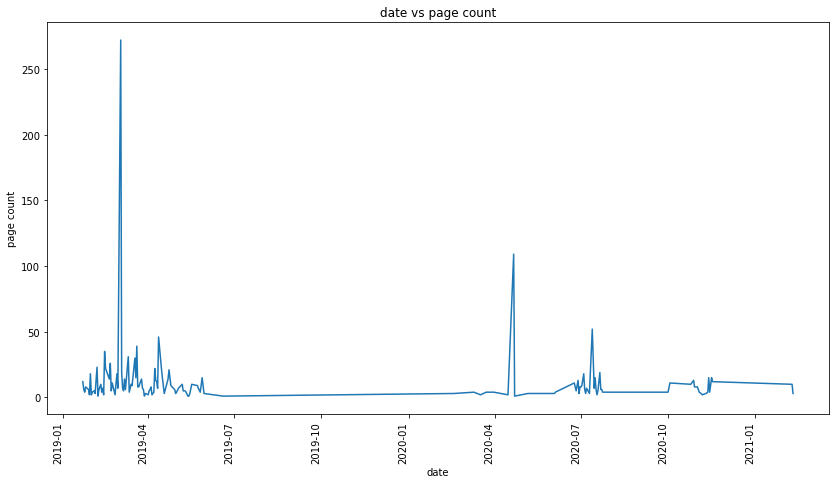

In [76]:
plt.figure(figsize = (14,8))
df[df.user_id == 341].index.value_counts().plot()
plt.xticks(rotation = 90)
plt.ylabel("page count")
plt.xlabel("date")
plt.title("date vs page count")
plt.show()

    the highest peak, the page count, must be 272. it was one day event.looks like he does not ping the pages on frequest basis

it does not appear any web-scraping is happening

In [77]:
df[df.user_id == 341].cohort_name.head(1)

date
2019-01-22    Zion
Name: cohort_name, dtype: object

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [78]:
#define a data science graduate
ds_grad = ds[ds.index > ds.end_date]

In [79]:
#graduate data science endpoint value count
ds_grad.endpoint.value_counts().head()

search/search_index.json                          493
sql/mysql-overview                                275
classification/overview                           266
classification/scale_features_or_not.svg          219
anomaly-detection/AnomalyDetectionCartoon.jpeg    193
Name: endpoint, dtype: int64

    sql/mysql overview and classification overview are most referred after gradaution by data science students

In [80]:
#define web dev graduate
web_grad = web[web.index > web.end_date]
#graduate web dev endpoint value count
web_grad.endpoint.value_counts().head()

javascript-i                3148
spring                      2858
html-css                    2394
search/search_index.json    2332
java-i                      2268
Name: endpoint, dtype: int64

    web dev students refer to javascript and spring most after gradaution

### 7. Which lessons are least accessed? 


Text(0.5, 1.0, 'data science least accessed endpoint vs count')

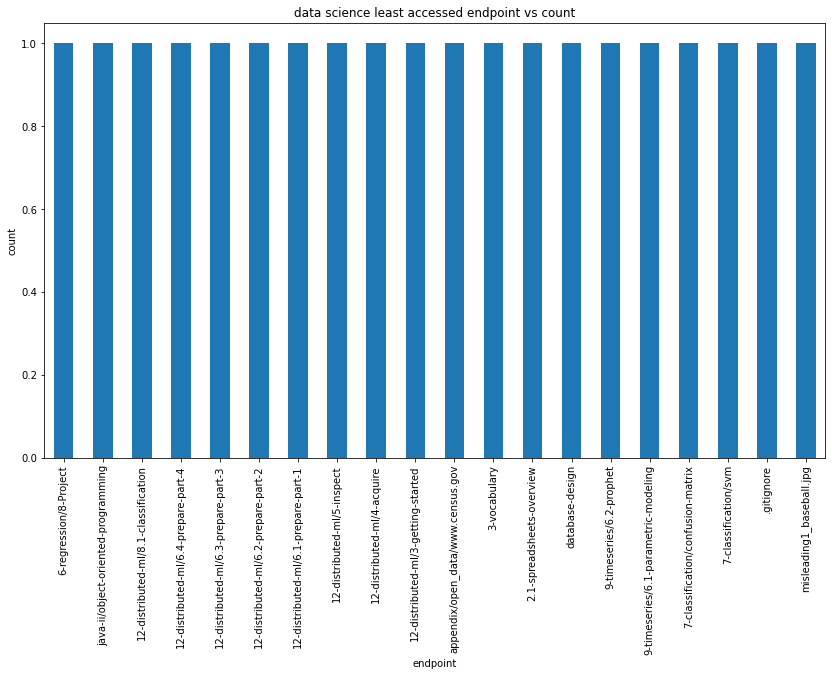

In [81]:
#visualise for Data science
plt.figure(figsize = (14,8))
#run value count on endpoint, sort by ascending to plot bargraph
ds.endpoint.value_counts(ascending = True)[:20].plot.bar()
plt.xlabel("endpoint")
plt.ylabel("count")
plt.title("data science least accessed endpoint vs count")

    for data science, lessons like regression project, java-ii objected programming and distributed ml classifcattion were least accessed

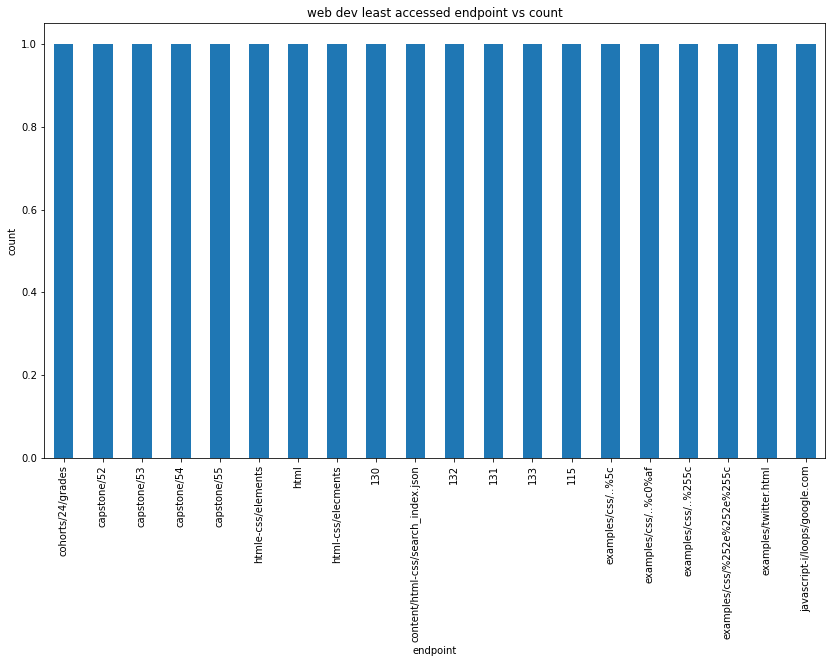

In [82]:
#visualise for web dev
plt.figure(figsize = (14,8))
#run value count on endpoint, sort by ascending to plot bargraph
web.endpoint.value_counts(ascending = True)[:20].plot.bar()
plt.xlabel("endpoint")
plt.ylabel("count")
plt.title("web dev least accessed endpoint vs count")
plt.show()

for web dev,some of least accessed lessons are  captone 52, capstone 53, html css/elements